In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
base_dir = "/content/drive/MyDrive/WR"
data_dir = base_dir + "/NewWRData"
train_dir = data_dir + "/train"
val_dir = data_dir + "/val"
test_dir = data_dir + "/test"

In [4]:
!pip install torch torchvision
!pip install opencv-python-headless
!pip install matplotlib
!pip install seaborn
!pip install pandas


In [5]:
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16575, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 16575 (delta 28), reused 37 (delta 18), pack-reused 16522
Receiving objects: 100% (16575/16575), 15.09 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (11381/11381), done.
/content/yolov5/yolov5


In [6]:
import torch

# Assuming you're still in the yolov5 folder
#model = torch.hub.load('.', 'custom', path='/content/drive/MyDrive/WR/yolo/yolov5n-seg.pt', source='local')
#model.eval()
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)



/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-5-2 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 128MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/WR/NewWRData/data2.yaml --weights yolov5s.pt


2024-05-02 04:01:08.200855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 04:01:08.200911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 04:01:08.202858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/WR/NewWRData/data2.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi

In [10]:
from google.colab import files

# Path to the trained weights
file_path = '/content/drive/MyDrive/WR/NewWRData/runs/train/exp/weights/best.pt'

# Download the file
files.download(file_path)

FileNotFoundError: Cannot find file: /content/drive/MyDrive/WR/NewWRData/runs/train/exp/weights/best.pt

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 640x640 26 persons
Speed: 351.1ms pre-process, 109.0ms inference, 875.2ms NMS per image at shape (1, 3, 640, 640)


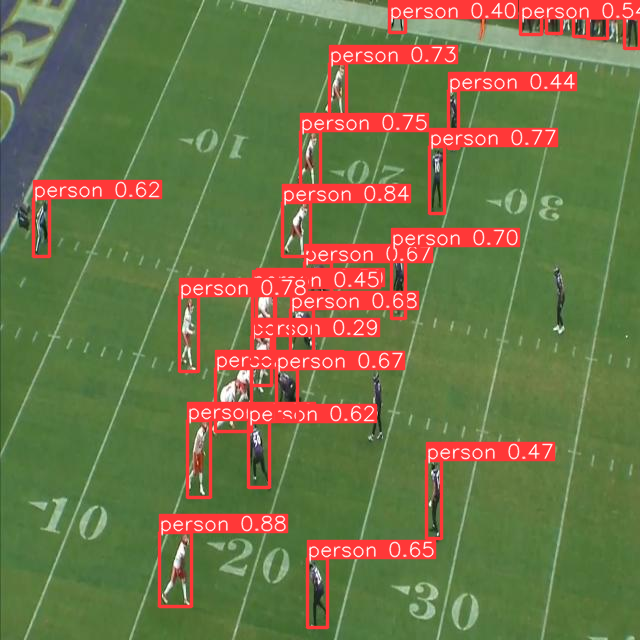

In [11]:
results = model('/content/drive/MyDrive/WR/NewWRData/test/images/AFCC6_png.rf.30bcc655dbdfad4d454d618f82c863d3.jpg')
results.print()  # Print results to console
results.show()